In [380]:
import numpy as np
import seaborn as sns
import glob
import cv2
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report, confusion_matrix
from skimage.feature import hog

Images with car: 8792
Images without car: 8968


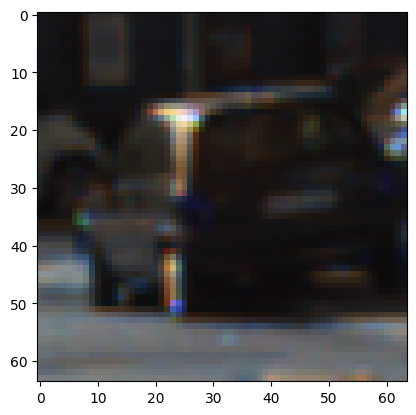

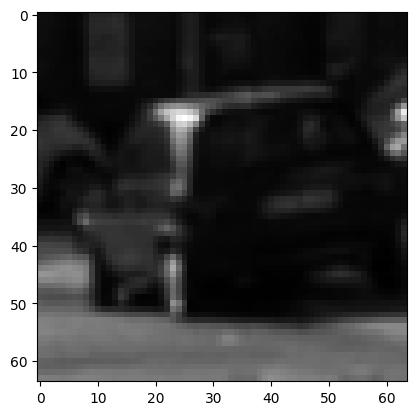

In [381]:

car = glob.glob('Datasets/Cars/vehicles/*.png')
no_car = glob.glob('Datasets/Cars/non-vehicles/*.png')

print(f'Images with car: {len(car)}')
print(f'Images without car: {len(no_car)}')

image_colour = cv2.imread(car[20])
plt.figure()
plt.imshow(image_colour)

image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(image_grey, cmap='gray')

(396,)
(64, 64)


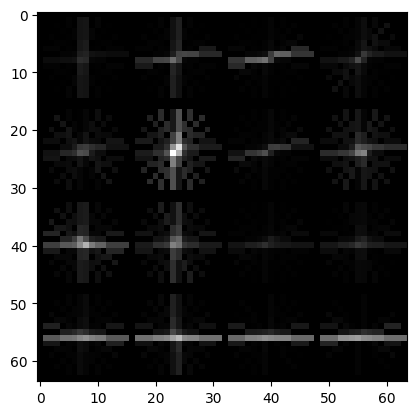

In [382]:
features, hog_image = hog(image_grey, 
                          orientations=11,
                          pixels_per_cell=(16, 16), 
                          cells_per_block=(2, 2),  
                          transform_sqrt=False,
                          visualize=True, 
                          feature_vector=True) #,block_norm='L2-Hys')

print(features.shape)
print(hog_image.shape)

plt.imshow(hog_image, cmap='gray')

In [383]:
car_hog_accum = []

for i in car:
    image_colour = mpimg.imread(i)
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    car_hog_feature, car_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True) #True
    
    car_hog_accum.append(car_hog_feature)

X_car = np.vstack(car_hog_accum).astype(np.float64)
y_car = np.ones(len(X_car))

print(X_car.shape)
print(y_car.shape)
print(y_car)

(8792, 396)
(8792,)
[1. 1. 1. ... 1. 1. 1.]


In [384]:
nocar_hog_accum = []

for i in no_car:
    image_colour = mpimg.imread(i)
    image_grey = cv2.cvtColor(image_colour, cv2.COLOR_BGR2GRAY)
    nocar_hog_feature, nocar_hog_img = hog(image_colour[:,:,0], 
                                    orientations=11,
                                    pixels_per_cell=(16, 16), 
                                    cells_per_block=(2, 2),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=True) #True
    
    nocar_hog_accum.append(nocar_hog_feature)

X_nocar = np.vstack(nocar_hog_accum).astype(np.float64)
y_nocar = np.zeros(len(X_nocar))

print(X_nocar.shape)
print(y_nocar.shape)
print(y_nocar)

(8968, 396)
(8968,)
[0. 0. 0. ... 0. 0. 0.]


In [385]:
X = np.vstack((X_car, X_nocar))
y = np.hstack((y_car, y_nocar))

print(X.shape)
print(y.shape)

(17760, 396)
(17760,)


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      2224
         1.0       0.96      0.96      0.96      2216

    accuracy                           0.96      4440
   macro avg       0.96      0.96      0.96      4440
weighted avg       0.96      0.96      0.96      4440

Model Predictions: [0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 1.]

Model True Labels: [0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 1.]


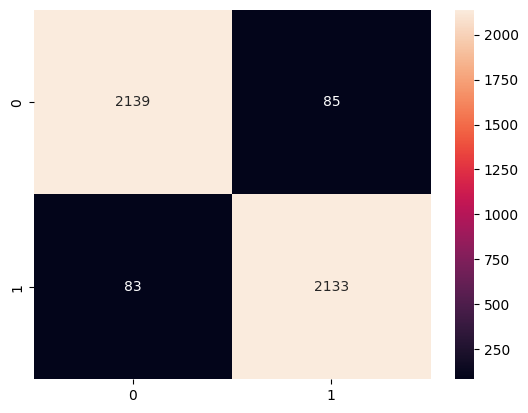

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

svc_model = LinearSVC(dual=False) # FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5.
svc_model.fit(X_train, y_train)

y_predict = svc_model.predict(X_test)

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt='d')

print(classification_report(y_test, y_predict))

Model_prediction = svc_model.predict(X_test[0:100])
print(f'Model Predictions: {Model_prediction}')

Model_TrueLabel = y_test[0:100]
print(f'\nModel True Labels: {Model_TrueLabel}')

In [387]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)
grid.fit(X_train, y_train)
grid.best_params_
grid.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.966 total time=  25.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.969 total time=  23.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.969 total time=  21.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time=  22.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.974 total time=  23.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.959 total time=  15.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.964 total time=  15.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.970 total time=  15.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.963 total time=  15.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.972 total time=  15.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.927 total time=  33.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

SVC(C=10, gamma=1)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2224
         1.0       0.99      0.99      0.99      2216

    accuracy                           0.99      4440
   macro avg       0.99      0.99      0.99      4440
weighted avg       0.99      0.99      0.99      4440



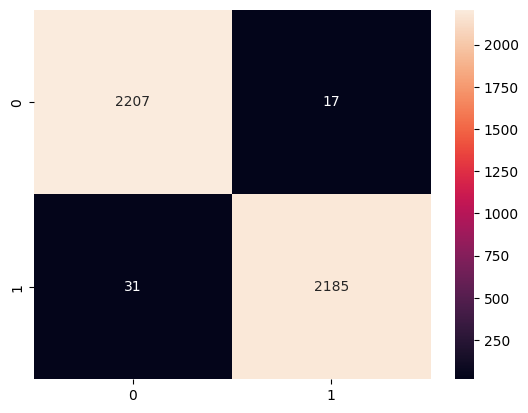

In [388]:
grid_predictions = grid.predict(X_test)
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, grid_predictions))

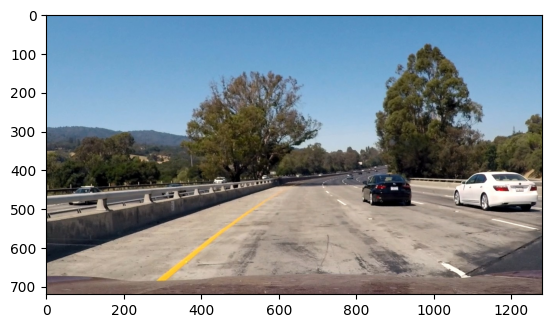

In [389]:
test_image = mpimg.imread('Datasets/CarND-Vehicle-Detection-master/test_images/test1.jpg')
plt.figure()
plt.imshow(test_image)
test_image = test_image.astype(np.float32)/255

(300, 1280, 3)

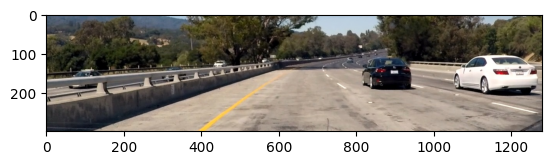

In [390]:
h_start = 300
h_stop = 600

pixels_in_cell = 16
HOG_orientations = 11
cells_in_block = 2
cells_in_step = 3

masked_region = test_image[h_start:h_stop,:,:]
plt.figure()
plt.imshow(masked_region)
masked_region.shape

(176, 752, 3)


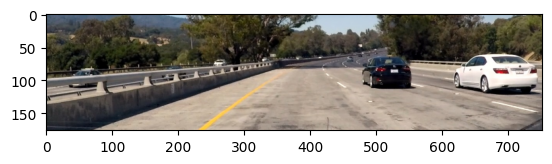

In [438]:
resizing_factor = 1.7
masked_region_shape = masked_region.shape
L = masked_region_shape[1]/resizing_factor
W = masked_region_shape[0]/resizing_factor

masked_region_resized = cv2.resize(masked_region, (int(L), int(W)))
masked_region_resized_R = masked_region_resized[:,:,0]

print(masked_region_resized.shape)
plt.figure()
plt.imshow(masked_region_resized)


In [439]:
HOG_orientations = 11
pixels_in_cell = 16
cells_in_block = 2


print(masked_region_resized_R.shape)
masked_region_hog_feature_all, hog_image = hog(masked_region_resized_R, 
                                    orientations=HOG_orientations,
                                    pixels_per_cell=(pixels_in_cell, pixels_in_cell), 
                                    cells_per_block=(cells_in_block, cells_in_block),  
                                    transform_sqrt=False,
                                    visualize=True, 
                                    feature_vector=False)

n_blocks_x = (masked_region_resized_R.shape[1] // pixels_in_cell)+1
n_blocks_y = (masked_region_resized_R.shape[0] // pixels_in_cell)+1

#nfeat_per_block = orientations * cells_in_block **2
blocks_in_window = (64 // pixels_in_cell)-1

steps_x = (n_blocks_x - blocks_in_window) // cells_in_step
steps_y = (n_blocks_y - blocks_in_window) // cells_in_step

rectangles_found = []

for x_blocks in range(steps_x):
    for y_blocks in range(steps_y):
        y_position = y_blocks * cells_in_step
        x_position = x_blocks * cells_in_step

        hog_feat_sample = masked_region_hog_feature_all[y_position : y_position + blocks_in_window, x_position : x_position + blocks_in_window].ravel()
        x_left = x_position * pixels_in_cell
        y_top = y_position * pixels_in_cell
        print(hog_feat_sample.shape)

        # predict using trained SVM
        #test_prediction = svc_model.predict(hog_feat_sample.reshape(1, -1)) # Basic SVM
        test_prediction = grid.predict(hog_feat_sample.reshape(1, -1))

        if test_prediction == 1:
            rectangle_x_left = int(x_left * resizing_factor)
            rectangle_y_top = int(y_top * resizing_factor)
            window_dim = int(64 * resizing_factor)
            rectangles_found.append(((rectangle_x_left, rectangle_y_top + h_start), (rectangle_x_left + window_dim, rectangle_y_top + window_dim + h_start)))

print(f'Location of Cars Found: {rectangles_found}')


(176, 752)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
Location of Cars Found: [((816, 381), (924, 489)), ((1142, 381), (1250, 489))]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


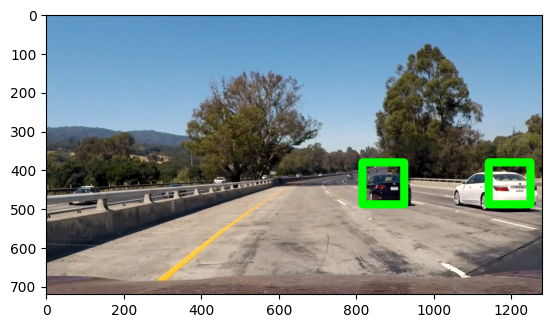

In [440]:
Image_with_Rectangles = np.copy(test_image)

for rectangle in rectangles_found:
    cv2.rectangle(Image_with_Rectangles, rectangle[0], rectangle[1], (0, 255, 0), 20)

plt.figure()
plt.imshow(Image_with_Rectangles)

In [394]:
GridSearch_kernel_type = 'rbf'



In [395]:

# # Dummy model class (Replace with your actual model)
# class MyModel:
#     def fit(self, X, y):
#         pass
#     def predict(self, X):
#         return np.zeros(len(X))

# # Dummy function to generate X, y data (Replace with your data generation logic)
# def generate_data(parameter_array):
#     X = np.array(parameter_array).reshape(-1, 1)  # Example feature matrix
#     y = np.random.rand(len(X))  # Example target vector
#     return X, y

# # Initial search parameters
# initial_multiplier = 250
# minimum_precision = 0.5  # Define minimum precision here
# start, end = 0, 1000
# multiplier = initial_multiplier

# # Placeholder for the model (replace MyModel() with your model)
# model = MyModel()

# while multiplier >= minimum_precision:
#     # Generate parameter array
#     parameter_array = [i * multiplier for i in range(start, end)]
    
#     # Generate data (Replace with your actual data generation logic)
#     X, y = generate_data(parameter_array)
    
#     # Define parameter grid (assuming 'param' is the parameter you're tuning)
#     param_grid = {'param': parameter_array}
    
#     # Initialize and fit GridSearchCV
#     grid_search = GridSearchCV(model, param_grid, cv=5)  # Assuming 5-fold CV
#     grid_search.fit(X, y)
    
#     # Get best parameter value
#     best_param = grid_search.best_params_['param']
#     print(f"Best parameter for multiplier {multiplier}: {best_param}")
    
#     # Find index of best parameter in original array to determine neighbors
#     best_index = parameter_array.index(best_param)
#     prev_value = parameter_array[best_index - 1] if best_index > 0 else None
#     next_value = parameter_array[best_index + 1] if best_index < len(parameter_array) - 1 else None
    
#     # Update start, end, and multiplier for next iteration
#     start = prev_value if prev_value is not None else start
#     end = next_value if next_value is not None else end
#     multiplier = max(multiplier / 2, minimum_precision)  # Use max to ensure we don't go below minimum_precision

#     # Check for convergence condition (e.g., multiplier is less than or equal to minimum precision)
#     if multiplier <= minimum_precision and multiplier != initial_multiplier:
#         break

# print("Final best parameter:", best_param)





# # bestTuningValue1 = 0
# # bestTuningValue2 = 0

# # for i in range(0.1*(10))
# # gamma1 = [i*100 for i in range(1000)]

# # gamma1 = [i / 10.0 for i in range(10)]
# # gamma1.extend([i for i in range(1, 10)])
# # gamma1.extend([i*10 for i in range(1, 10)])
# # gamma1.extend([i*50 for i in range(2, 21)])

# # C1 = gamma1

# # print(f'Values to test for model tuning: {gamma1}')
# # print(f'# of values: {len(gamma1)}')

# # if bestTuningValue1 in gamma1:
# #     index_gamma1 = gamma1.index(bestTuningValue1)
# #     prev_value = gamma1[index_gamma1 - 1] if index_gamma1 > 0 else None
# #     next_value = gamma1[index_gamma1 + 1] if index_gamma1 < len(gamma1) - 1 else None

# # if bestTuningValue1 > 1 & bestTuningValue1 < 10:
# #     gamma2 = [i / 10.0 for i in range(prev_value, next_value)]

# # elif bestTuningValue1 > 10 & bestTuningValue1 < 100:
# #     gamma2 = [i for i in range(prev_value, next_value)]
    
# # elif bestTuningValue1 > 100:
# #     gamma2 = [i*10 for i in range(prev_value, next_value)]





